In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import datetime as dt
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

### Extracting Dataset

In [10]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')


C:\Users\mauli\AppData\Local\Temp\ipykernel_17220\3421753324.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')


In [11]:
df.shape

(181691, 135)

### Data cleanning 

In [12]:
columns = df.columns.tolist()         
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [13]:
# renaming relevant columns
df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','region':'enc_region',\
                     'attacktype1_txt':'attacktype','attacktype1':'enc_attacktype',
                     'provstate':'province','country':'enc_country',\
                     'targtype1_txt':'target_type','targtype1':'enc_target',\
                     'targsubtype1_txt':'target_subtype',\
                     'target1':'target_entity','weaptype1':'enc_weapon_type',\
                     'weaptype1_txt':'weapon_type','weapsubtype1_txt':'weapon_subtype','weapsubtype1':'enc_weapon_subtype',\
                     'corp1':'entity','natlty1':'enc_nationality','natlty1_txt':'nationality',\
                     'gname':'group','nkill':'killed','nwound':'wounded',\
                     'targsubtype':'enc_target_subtype',\
                     'ishostkid':'hostages/kidnapping','INT_LOG':'cross_border',\
                     'INT_IDEO':'ideological_international'}, inplace = True)

In [14]:
categorical = ['extended','crit1','crit2','crit3','doubtterr','alternative','alternative_txt','multiple','enc_country','country_txt','enc_region','region_txt','vicinity','specificity','enc_attacktype','attacktype','enc_weapon_type','weapon_type','enc_weapon_subtype','weapon_subtype','success','suicide','target_entity','enc_target','target_type','target_subtype','enc_nationality','nationality','claimed','property','cross_border','ideological_international','province','entity','group','hostages/kidnapping','city','INT_MISC','INT_ANY','individual']
numerical = ['eventid','year','month','day','latitude','longitude','killed','nkillter','wounded']
text = ['approxdate','summary','related','location','motive']

In [15]:
# converting specific columns to category data type
for item in categorical:
    if item not in df.columns:
        pass
    else:
        df[item] = df[item].astype('category')

In [16]:
# unique categories in each categorical column
for feature in categorical:
    print(feature,":",len(df[feature].unique()),'labels')

extended : 2 labels
crit1 : 2 labels
crit2 : 2 labels
crit3 : 2 labels
doubtterr : 4 labels
alternative : 6 labels
alternative_txt : 6 labels
multiple : 3 labels
enc_country : 205 labels
country_txt : 205 labels
enc_region : 12 labels
region_txt : 12 labels
vicinity : 3 labels
specificity : 6 labels
enc_attacktype : 9 labels
attacktype : 9 labels
enc_weapon_type : 12 labels
weapon_type : 12 labels
enc_weapon_subtype : 31 labels
weapon_subtype : 31 labels
success : 2 labels
suicide : 2 labels
target_entity : 86007 labels
enc_target : 22 labels
target_type : 22 labels
target_subtype : 113 labels
enc_nationality : 216 labels
nationality : 216 labels
claimed : 4 labels
property : 3 labels
cross_border : 3 labels
ideological_international : 3 labels
province : 2856 labels
entity : 33239 labels
group : 3537 labels
hostages/kidnapping : 4 labels
city : 36675 labels
INT_MISC : 3 labels
INT_ANY : 3 labels
individual : 2 labels


In [17]:
df.describe()

,eventid,year,month,day,latitude,longitude,attacktype2,attacktype3,targsubtype1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,killed,nkillus,nkillter,wounded,nwoundus,nwoundte,propextent,propvalue,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,6314.000000,428.000000,171318.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,110576.000000,112202.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,64065.000000,3.898900e+04,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,3.719512,5.245327,46.971474,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,-65.361154,-1.517727,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,3.295403,2.088119e+05,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,2.272023,2.246642,30.953357,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,216.536633,12.830346,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,0.486912,1.552463e+07,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.900000e+01,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,2.000000,2.000000,22.000000,4.000000,34.000000,92.000000,3.000000,33.000000,75.000000,0.000000,0.000000,0.000000,-99.000000,0.000000,6.000000,0.000000,6.000000,0.000000,4.000000,-9.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-9.900000e+01,1.000000,0.000000,-99.000000,-99.000000,0.000000,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,2.000000,7.000000,35.000000,14.000000,67.000000,98.000000,14.000000,67.000000,110.000000,0.000000,0.000000,0.000000,-99.000000,0.000000,8.000000,0.000000,7.000000,0.000000,7.000000,-9.000000,6.000000,7.000000,6.000000,7.000000,6.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-9.900000e+01,2.000000,0.000000,-99.000000,-99.000000,0.000000,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,7.000000,7.000000,74.000000,14.000000,69.000000,182.000000,14.000000,73.000000,182.000000,0.000000,1.000000,0.000000,1.000000,0.000000,8.000000,1.000000,10.000000,1.000000,9.000000,0.000000,8.000000,18.000000,9.00

In [23]:
import pandas as pd
import numpy as np

def null_info(df, categorical, numerical, text):
    # Drop specified columns from the DataFrame
    df = df.drop(columns=['success','eventid'])
    
    # Create an empty DataFrame to store null information
    columns_info = ['% of columns containing non_missing values',
                    '% of columns containing missing values',
                    '% of columns containing >50% missing values',
                    '% of columns containing <=50% missing values',
                    '% of columns containing >90% missing values',
                    'No. of features',
                    'No. of categorical features',
                    'No. of numerical features',
                    'No. of Text features']
    
    df_null_info = pd.DataFrame(columns=columns_info)
    
    df_null = pd.DataFrame(df.isnull().sum() / len(df))
    df_null.columns = ['Null_values']
    
    df_null_info.loc['Values', 'No. of features'] = round(df_null.shape[0])
    df_null_info.loc['Values', 'No. of categorical features'] = round(len(categorical))
    df_null_info.loc['Values', 'No. of numerical features'] = round(len(numerical))
    df_null_info.loc['Values', 'No. of Text features'] = round(len(text))
    
    df_null_info.loc['Values', '% of columns containing non_missing values'] = round(100 * len(df_null[df_null.Null_values == 0.0]) / len(df_null), 2)
    df_null_info.loc['Values', '% of columns containing missing values'] = round(100 * len(df_null[df_null.Null_values > 0.0]) / len(df_null), 2)
    df_null_info.loc['Values', '% of columns containing >50% missing values'] = round(100 * len(df_null[df_null.Null_values > 0.50]) / len(df_null), 2)
    df_null_info.loc['Values', '% of columns containing <=50% missing values'] = round(100 * len(df_null[df_null.Null_values <= 0.50]) / len(df_null), 2)
    df_null_info.loc['Values', '% of columns containing >90% missing values'] = round(100 * len(df_null[df_null.Null_values > 0.90]) / len(df_null), 2)
    
    return df_null_info.T

# Example usage:
# Replace 'your_dataframe', 'categorical_columns', 'numerical_columns', 'text_columns'
result = null_info(df, categorical, numerical, text)



In [24]:
result

,Values
% of columns containing non_missing values,20.3
% of columns containing missing values,79.7
% of columns containing >50% missing values,57.89
% of columns containing <=50% missing values,42.11
% of columns containing >90% missing values,46.62
No. of features,133
No. of categorical features,40
No. of numerical features,9
No. of Text features,5


In [25]:
def columns_with_missing_above_threshold(df, threshold):
    """
    Get column names with missing values above a specified threshold.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame to analyze.
        threshold (float): The threshold above which missing values are considered.
        
    Returns:
        list: List of column names with missing values above the threshold.
    """
    missing_percentages = df.isnull().mean() * 100
    columns_above_threshold = missing_percentages[missing_percentages > threshold].index.tolist()
    return columns_above_threshold

# Example usage:
# Replace 'your_dataframe' and 20 with your actual DataFrame and threshold
missing_columns = columns_with_missing_above_threshold(df, 20)
print("Columns with more than 20% missing values:", missing_columns)


Columns with more than 20% missing values: ['approxdate', 'resolution', 'location', 'summary', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'entity', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'weapdetail', 'nkillus', 'nkillter', 'nwoundus', 'nwoundte', 'propextent', 'propextent_txt', 'propvalue', 'propco

In [30]:
def remove_columns_with_missing_above_threshold(df, threshold):
    """
    Remove columns with missing values above a specified threshold.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame to remove columns from.
        threshold (float): The threshold above which missing values are considered.
        
    Returns:
        pandas.DataFrame: DataFrame with specified columns removed.
    """
    missing_percentages = df.isnull().mean() * 100
    columns_above_threshold = missing_percentages[missing_percentages > threshold].index.tolist()
    
    df = df.drop(columns=columns_above_threshold)
    return df

# Example usage:
# Replace 'your_dataframe' and 20 with your actual DataFrame and threshold
df = remove_columns_with_missing_above_threshold(df, 20)

In [31]:
df

,eventid,year,month,day,extended,enc_country,country_txt,enc_region,region_txt,province,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,enc_attacktype,attacktype,enc_target,target_type,targsubtype1,target_subtype,target_entity,enc_nationality,nationality,group,guncertain1,individual,enc_weapon_type,weapon_type,enc_weapon_subtype,weapon_subtype,killed,wounded,property,hostages/kidnapping,dbsource,cross_border,ideological_international,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,5,Firearms,5.0,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,8,Incendiary,18.0,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Office,92.0,India,Unknown,0.0,0,6,Explosives,7.0,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [32]:
df.dtypes

eventid                         int64
year                            int64
month                           int64
day                             int64
extended                     category
enc_country                  category
country_txt                  category
enc_region                   category
region_txt                   category
province                     category
city                         category
latitude                      float64
longitude                     float64
specificity                  category
vicinity                     category
crit1                        category
crit2                        category
crit3                        category
doubtterr                    category
multiple                     category
success                      category
suicide                      category
enc_attacktype               category
attacktype                   category
enc_target                   category
target_type                  category
targsubtype1

### Top 10 Regions with Highest Terrorist Attacks

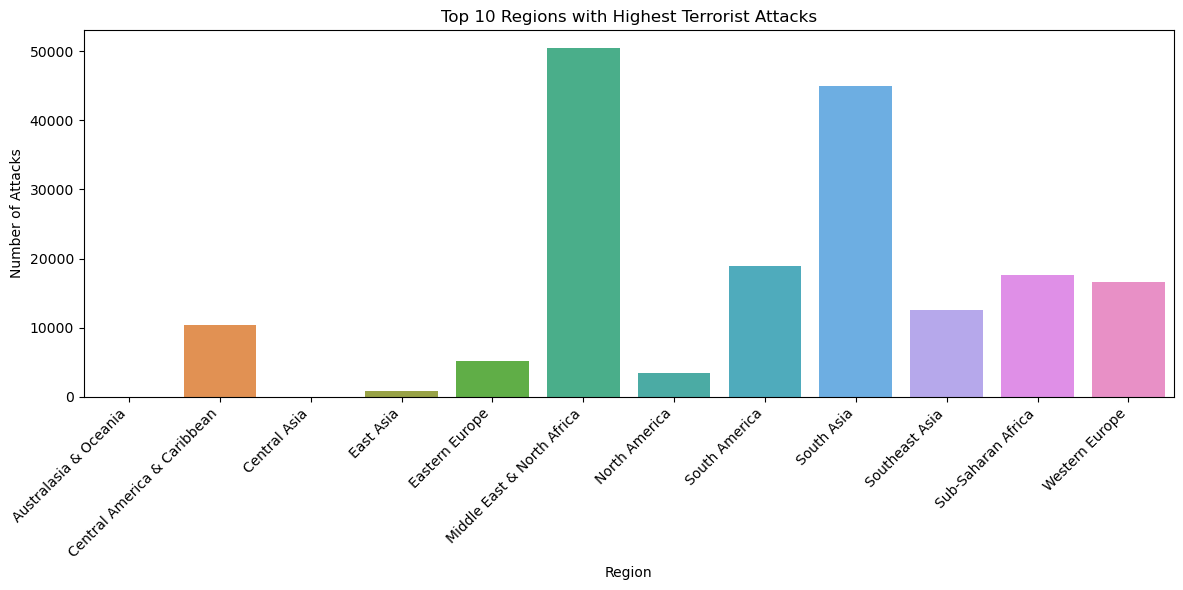

In [37]:
region_counts = df['region_txt'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Regions with Highest Terrorist Attacks')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

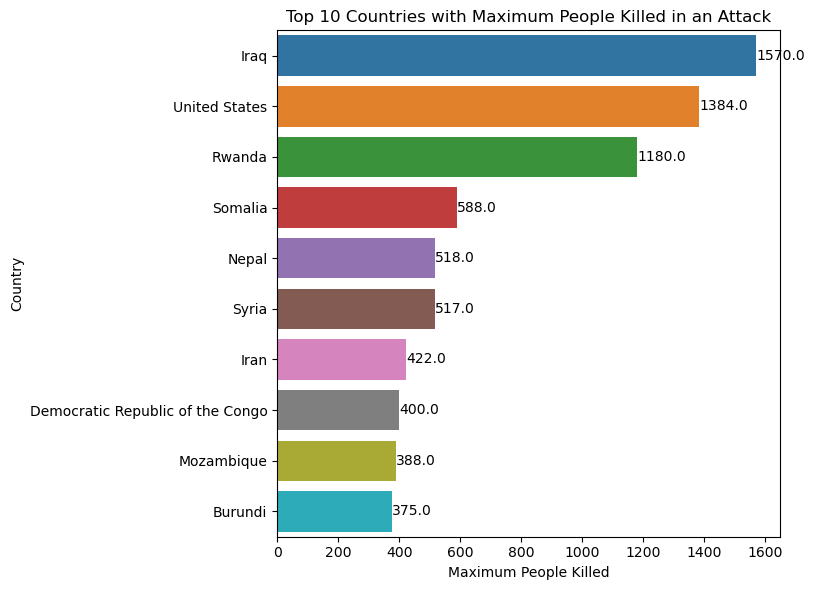

In [41]:
max_killed_per_country = df.groupby('country_txt')['killed'].max().sort_values(ascending=False).head(10)
top_countries = max_killed_per_country.index.tolist()

plt.figure(figsize=(8, 6))
sns.barplot(x=max_killed_per_country.values, y=top_countries, orient='h')
plt.title('Top 10 Countries with Maximum People Killed in an Attack')
plt.xlabel('Maximum People Killed')
plt.ylabel('Country')
plt.tight_layout()

# Display the names of the countries on the left side of the bars
for i, v in enumerate(max_killed_per_country.values):
    plt.text(v + 0.2, i, str(v), color='black', fontsize=10, va='center')

plt.show()


In [34]:
print('Country with Highest Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['region_txt'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['killed'].max(),'that took place in',df.loc[df['killed'].idxmax()].country_txt)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


### Comparing No. of Attacks with Killings for each country

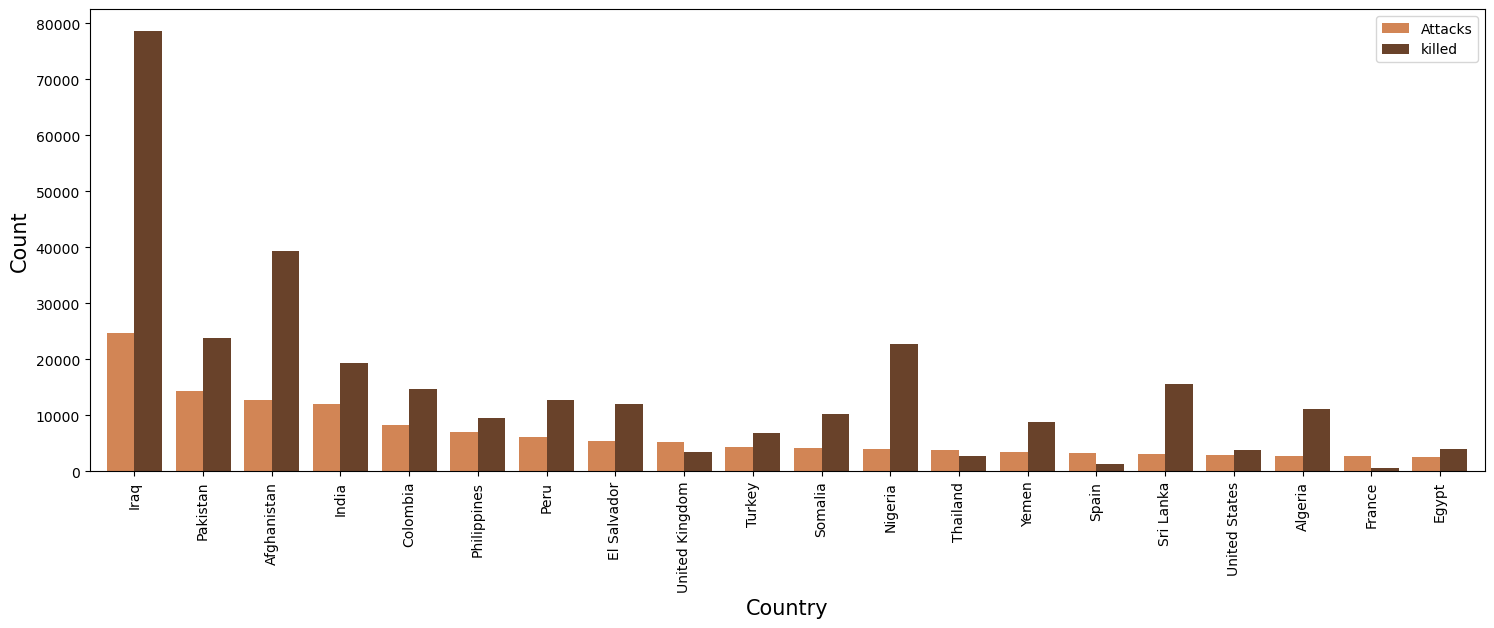

In [47]:

attacks = df.country_txt.value_counts()[:20].to_frame()
attacks.columns = ['Attacks']
kills = df.groupby(['country_txt'])['killed'].sum().sort_values(ascending =False).to_frame()
attacks.merge(kills, how = 'left' , left_index = True, right_index = True ).plot.bar(width = 0.8 , color = sns.color_palette('copper_r',2))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.ylabel("Count" ,fontsize = 15)
plt.xlabel("Country",fontsize = 15)
plt.show()

- Look at the bar of Iraq, it shows terrorist are very effective in getting what they wish for i.e destruction in terms of lives and same can be said for top 5 countries.
- Iraq:
     Highest Number of Attacks: Iraq has the highest number of terrorist attacks, which could indicate ongoing conflict or instability.
    Highest Number of Killings: Additionally, Iraq also has the highest number of people killed in these attacks, implying that the attacks in Iraq tend to be more lethal or cause greater casualties.
- The most safe country w.r.t this chart is France as the "attacks > kills".

### Number of Terrorist Attacks by Region

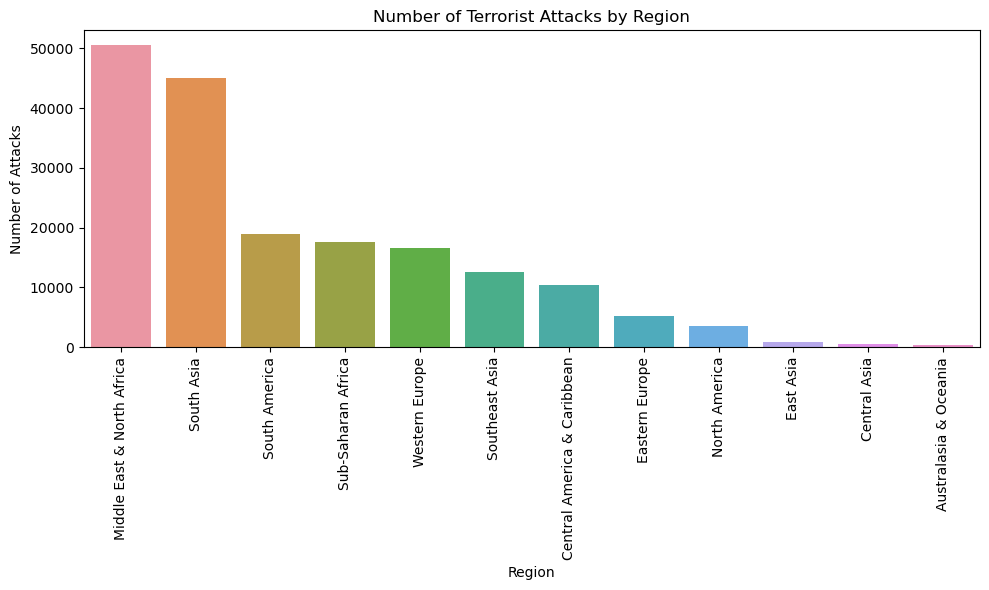

In [50]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region_txt', order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()


**Middle East and North Africa:**

- The region "Middle East and North Africa" has the highest number of terrorist attacks compared to other regions.
- This indicates that the region has experienced a significant amount of terrorist activity over the recorded period.

**Australasia and Oceania:**

- On the other hand, the region "Australasia and Oceania" has one of the lowest numbers of terrorist attacks.
- This suggests that this region has experienced relatively fewer instances of terrorist activities in comparison to other regions

### Number of Terrorist Attacks by Province (Top 20)

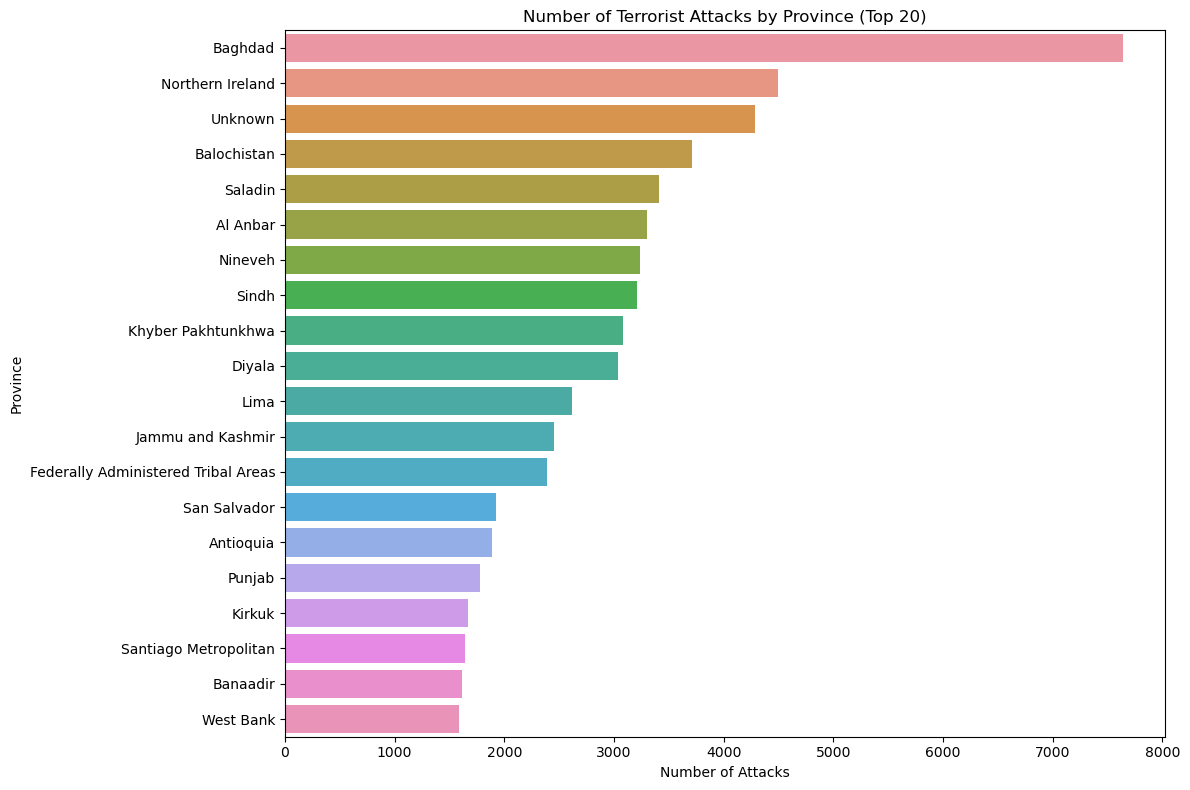

In [65]:
filtered_df = df[df['province'].notnull()]

# Get the top 20 provinces by incident count
top_provinces = filtered_df['province'].value_counts().head(20).index

# Create a bar plot for the 'province' column
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df[filtered_df['province'].isin(top_provinces)], y='province', order=top_provinces)
plt.title('Number of Terrorist Attacks by Province (Top 20)')
plt.xlabel('Number of Attacks')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

**Baghdad:**
- Baghdad, which is the capital of Iraq, has the highest number of reported terrorist attacks among provinces.
- This could be due to several factors, including political instability, conflict, and historical issues that have made the city a target for various terrorist groups.
- The high number of attacks in Baghdad indicates a significant security challenge that the region has been facing.

In [74]:
def Bar_plot(df, column_name, custom_figsize=None):

    if custom_figsize:
        plt.figure(figsize=custom_figsize)
    else:
        plt.figure(figsize=(10, 6))  # Default figure size
    
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    
    plt.title(f'{column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.tight_layout()
    
    plt.show()

### Target Types in Terrorist Incidents

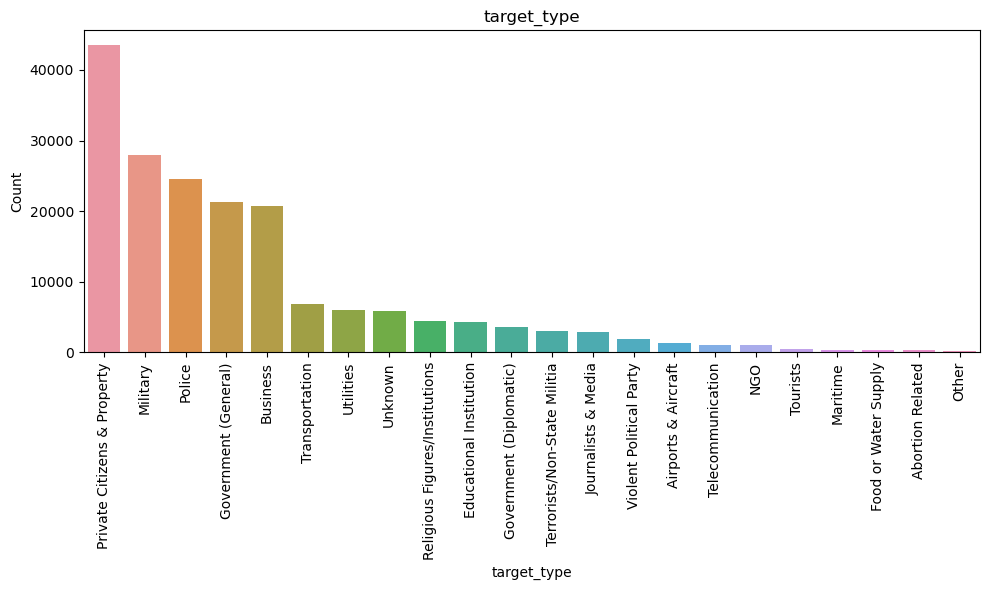

In [75]:
Bar_plot(df, 'target_type')

**Private Citizens and Companies:**
- Private citizens and companies emerge as the most common targets of terrorist incidents. This includes attacks on individuals, civilians, and private businesses. The high frequency of incidents targeting this category underscores the indiscriminate nature of some terrorist activities, affecting the general public and private entities.

**Military:**
- The military category follows closely as the second most targeted group. This encompasses attacks on armed forces, military bases, and installations. The frequency of incidents targeting military entities suggests the strategic importance of disrupting security and exerting pressure on government forces.

**Police:**
- The police category ranks third in terms of being targeted. Law enforcement agencies and police officers are often subject to attacks, which can be motivated by challenging authority, destabilizing security, or advancing specific ideological agendas.

### Weapon Types in Terrorist Incidents

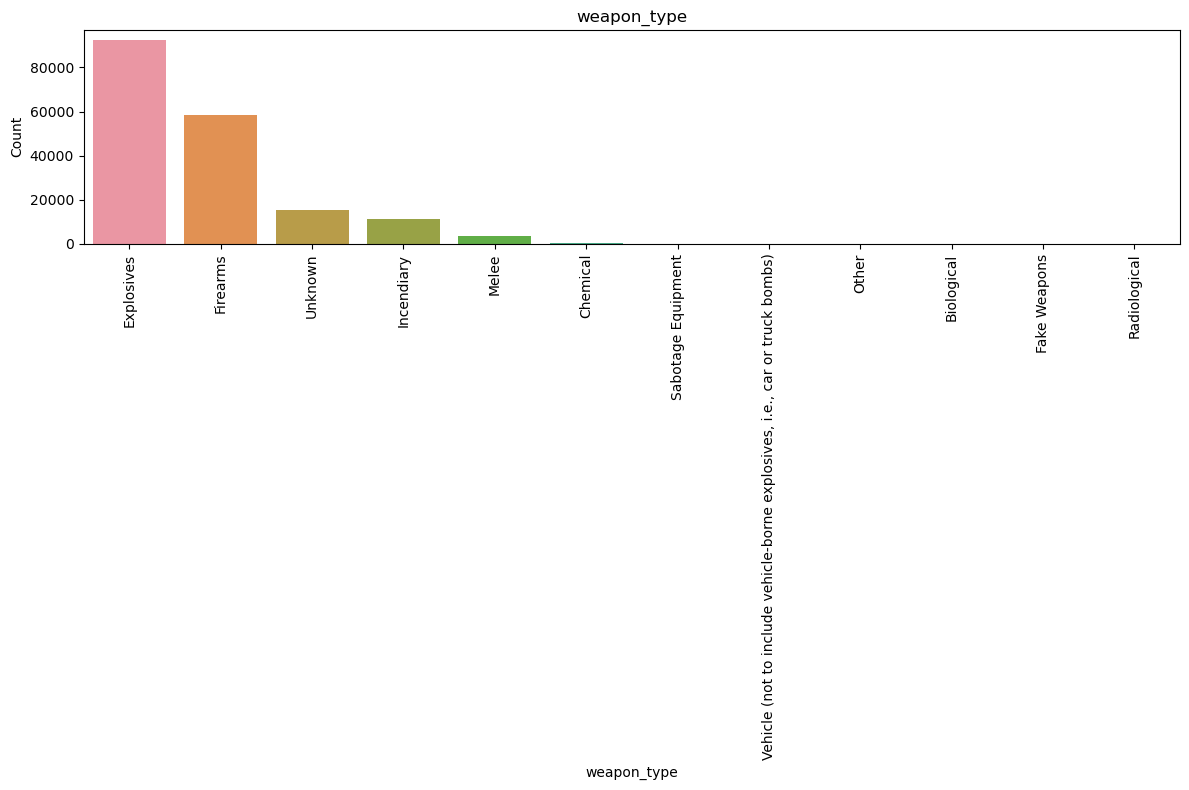

In [79]:
Bar_plot(df, 'weapon_type', custom_figsize=(12, 8))

- The prominence of "explosives" as the most frequent weapon type used in terrorist incidents underscores the strategic significance of this choice. The widespread adoption of explosives reflects the intent of terrorist groups to maximize impact by inflicting substantial damage, casualties, and fear among targeted populations.

### Terrorist Incidents by Year and Region

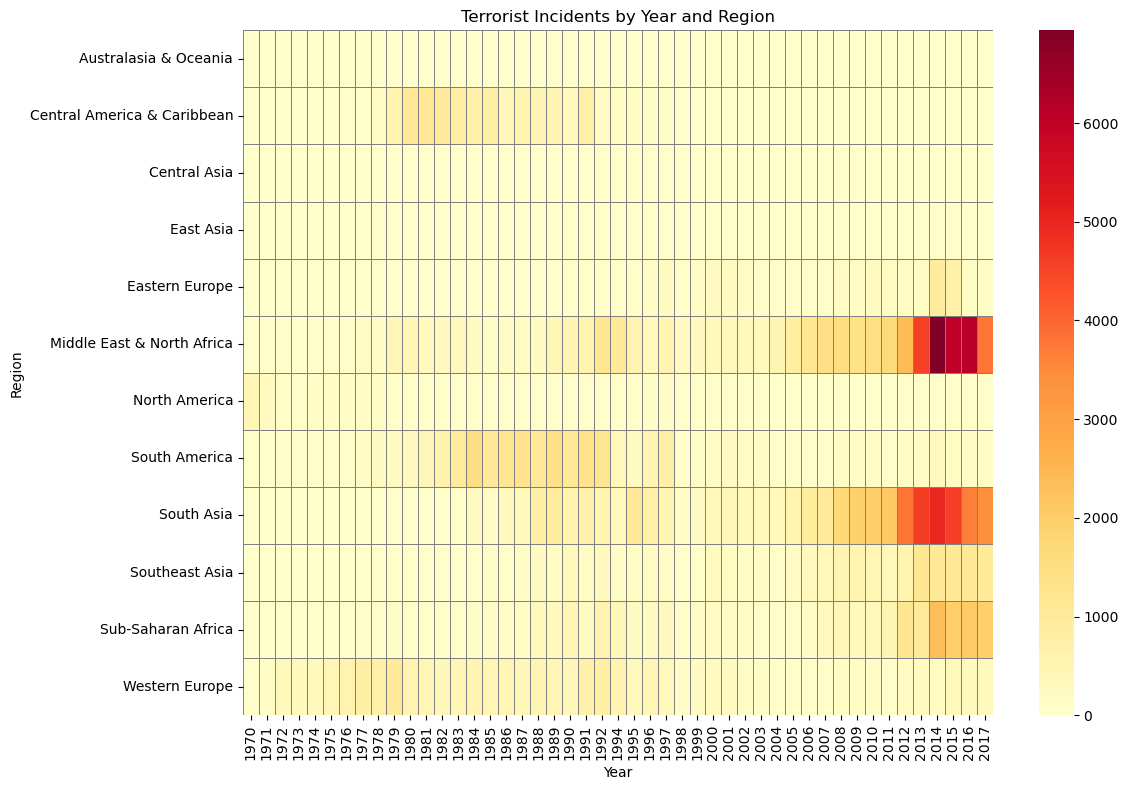

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a pivot table for heatmap
pivot_table = df.pivot_table(index='region_txt', columns='year', values='eventid', aggfunc='count')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.5, linecolor='gray')

plt.title('Terrorist Incidents by Year and Region')
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()

plt.show()


### Number of Terrorist Activities by Day, Month, Year

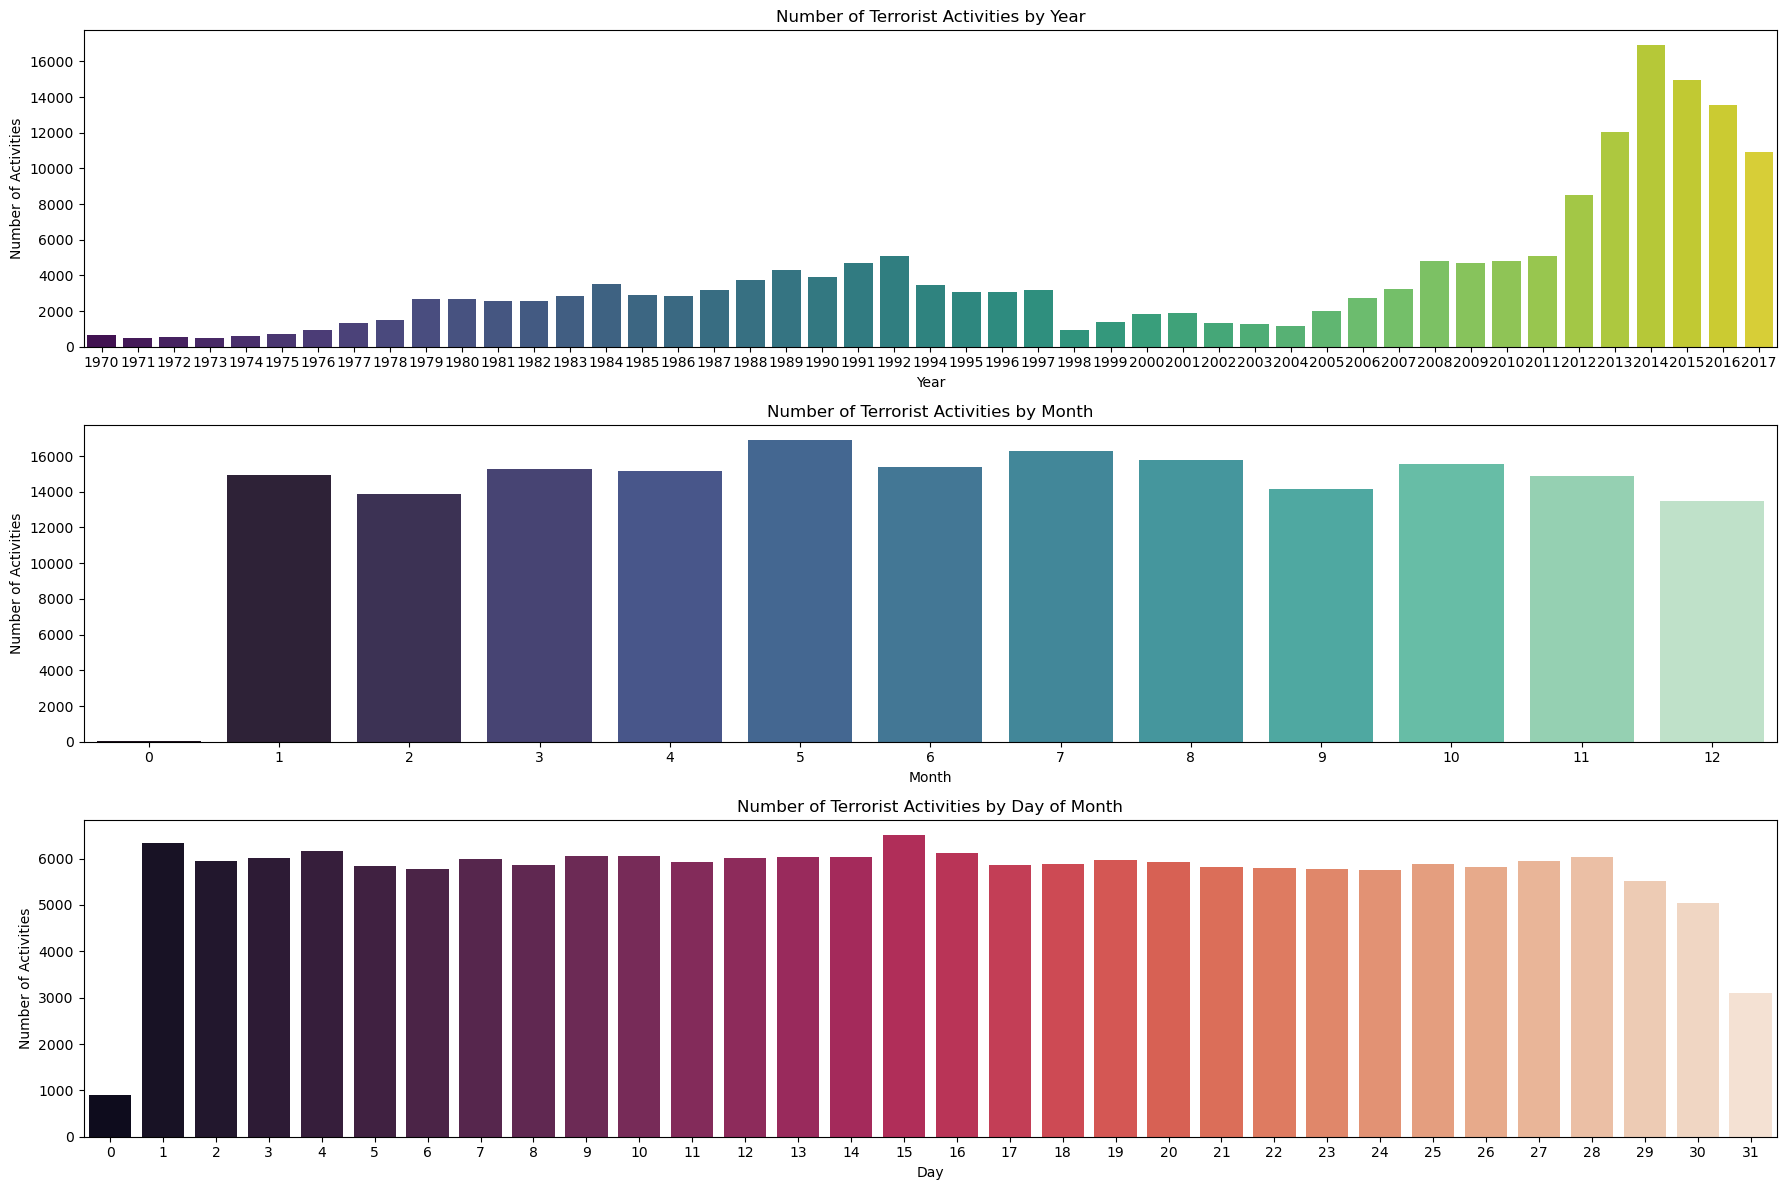

In [90]:

plt.figure(figsize=(18, 12))

# Create subplots for each time unit
plt.subplot(3, 1, 1)
sns.countplot(data=df, x='year', palette='viridis')
plt.title('Number of Terrorist Activities by Year')
plt.xlabel('Year')
plt.ylabel('Number of Activities')

plt.subplot(3, 1, 2)
sns.countplot(data=df, x='month', palette='mako')
plt.title('Number of Terrorist Activities by Month')
plt.xlabel('Month')
plt.ylabel('Number of Activities')

plt.subplot(3, 1, 3)
sns.countplot(data=df, x='day', palette='rocket')
plt.title('Number of Terrorist Activities by Day of Month')
plt.xlabel('Day')
plt.ylabel('Number of Activities')

plt.tight_layout()
plt.show()




